<a href="https://colab.research.google.com/github/Harshh2409/Prediction-model/blob/main/newPRED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [ ]:
insurDS=pd.read_csv("data_insur2new.csv")
insurDS.info()
insurDS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [ ]:
insurDS.head


<bound method NDFrame.head of       age  sex     bmi  children  smoker  region      charges  insuranceclaim
0      19    0  27.900         0       1       3  16884.92400               1
1      18    1  33.770         1       0       2   1725.55230               1
2      28    1  33.000         3       0       2   4449.46200               0
3      33    1  22.705         0       0       1  21984.47061               0
4      32    1  28.880         0       0       1   3866.85520               1
...   ...  ...     ...       ...     ...     ...          ...             ...
1333   50    1  30.970         3       0       1  10600.54830               0
1334   18    0  31.920         0       0       0   2205.98080               1
1335   18    0  36.850         0       0       2   1629.83350               1
1336   21    0  25.800         0       0       3   2007.94500               0
1337   61    0  29.070         0       1       1  29141.36030               1

[1338 rows x 8 columns]>

                     age       sex       bmi  children    smoker    region  \
age             1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127   
sex            -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588   
bmi             0.109272  0.046371  1.000000  0.012759  0.003750  0.157566   
children        0.042469  0.017163  0.012759  1.000000  0.007673  0.016569   
smoker         -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181   
region          0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000   
charges         0.299008  0.057292  0.198341  0.067998  0.787251 -0.006208   
insuranceclaim  0.113723  0.031565  0.384198 -0.409526  0.333261  0.020891   

                 charges  insuranceclaim  
age             0.299008        0.113723  
sex             0.057292        0.031565  
bmi             0.198341        0.384198  
children        0.067998       -0.409526  
smoker          0.787251        0.333261  
region         -0.006208        0.02089

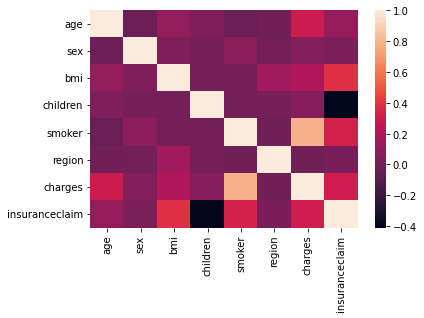

In [ ]:
c1=insurDS.corr();
print(c1)
sns.heatmap(c1,xticklabels=c1.columns,yticklabels=c1.columns)

NameError: ignored

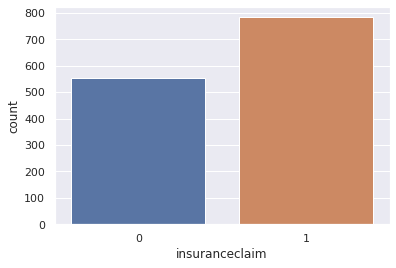

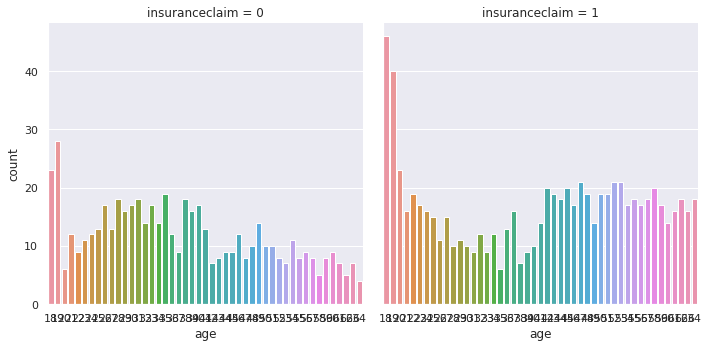

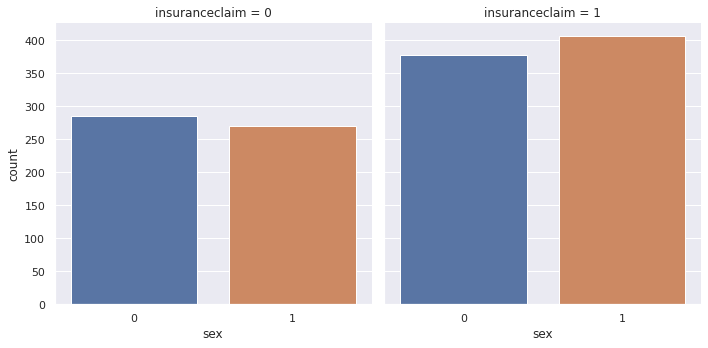

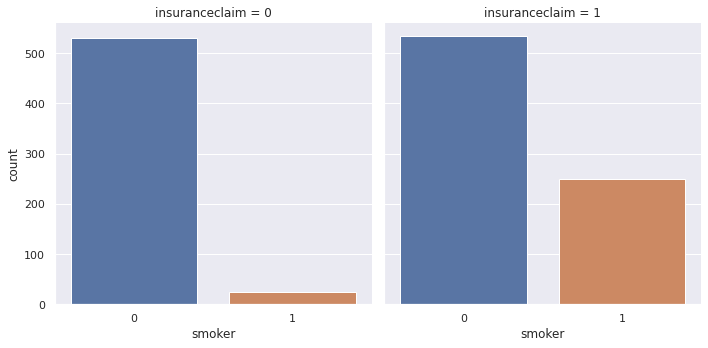

In [ ]:
sns.set(style="darkgrid")
sns.countplot(x='insuranceclaim',data=insurDS)
sns.catplot(x="age", col="insuranceclaim",data=insurDS, kind="count")
sns.catplot(x="sex", col="insuranceclaim",data=insurDS, kind="count")
sns.catplot(x="smoker", col="insuranceclaim",data=insurDS, kind="count")

plt.show()

In [ ]:
dfTrain = insurDS[:]

In [ ]:
trainLabel = np.asarray(dfTrain['insuranceclaim'])
trainData = np.asarray(dfTrain.drop('insuranceclaim',1))


means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)
trainData = (trainData - means)/stds



insuranceCheck = LogisticRegression(solver="lbfgs")
insuranceCheck.fit(trainData, trainLabel)


<ipython-input-10-fd50f407395b>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  trainData = np.asarray(dfTrain.drop('insuranceclaim',1))


LogisticRegression()

<ipython-input-12-5ebb1630d8dd>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  labels = list(dfTrain.drop('insuranceclaim',1).columns)


NameError: ignored

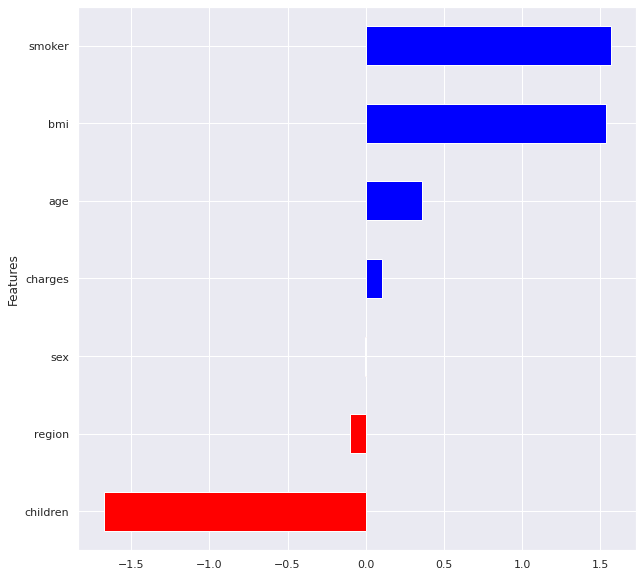

In [ ]:
coeff = list(insuranceCheck.coef_[0])
labels = list(dfTrain.drop('insuranceclaim',1).columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(10, 10),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')
plt.show()

In [ ]:
z=[]

In [ ]:
m=0
me=0
for j in range(0,100):
    for i in range(0,100):
        x_train,x_test,y_train,y_test=train_test_split(trainData,trainLabel)
        insuranceCheck.fit(x_train,y_train)
        yp=insuranceCheck.predict(x_test)
        p=accuracy_score(y_test,yp)
        if p>=m:
            m=p
            me = mean_absolute_error(y_test, yp)
    z.append(m*100)
print("Highest Accurate Model Accuracy Score=>",max(z),'%')
print("MAE=>",me)

Highest Accurate Model Accuracy Score=> 93.43283582089552 %
MAE=> 0.06567164179104477
